In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

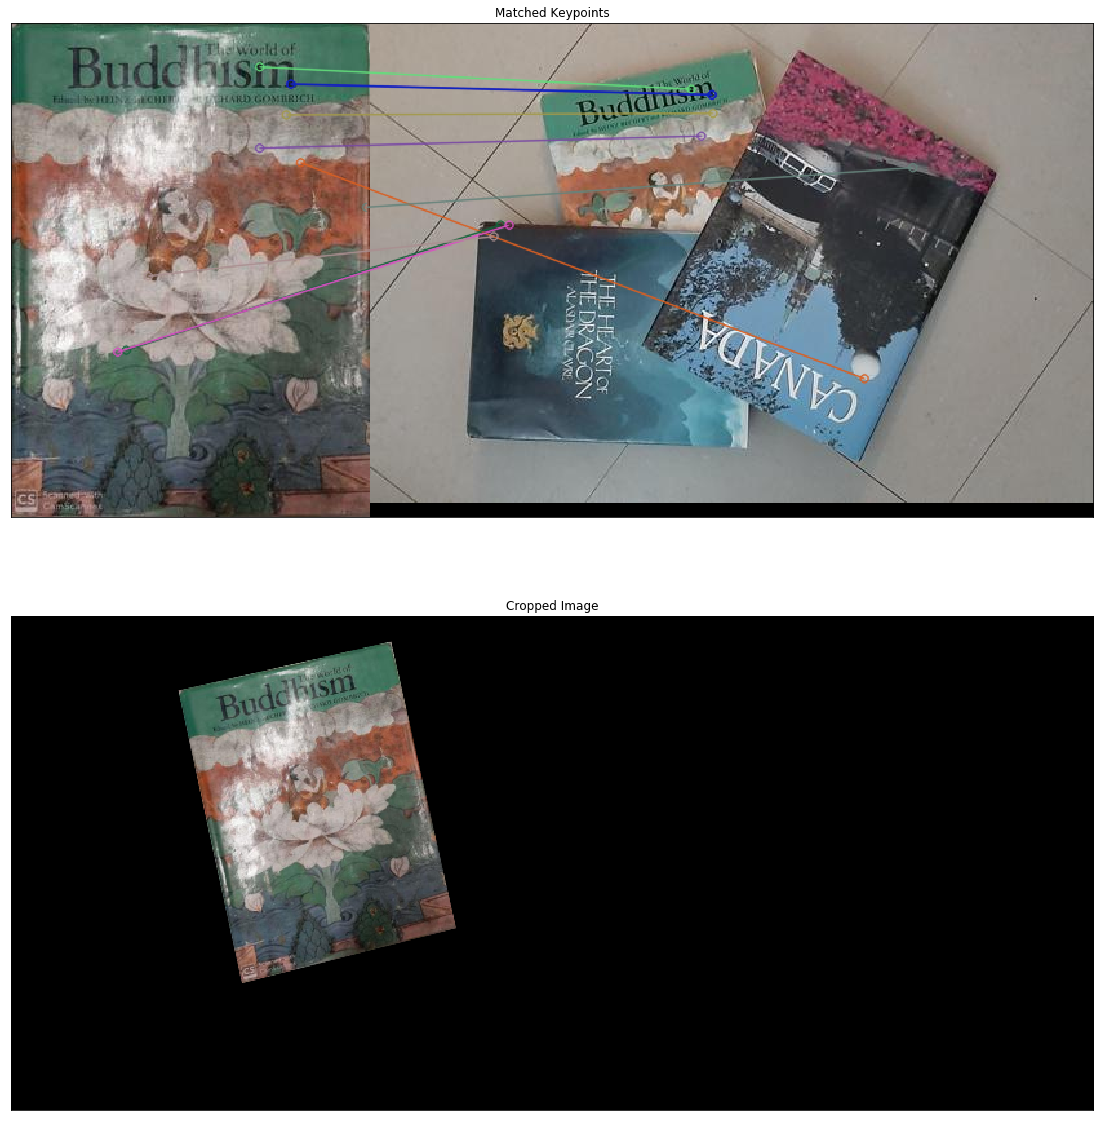

In [64]:
# Read images to stitch
imgl = cv2.imread('book_occlusion.jpg')
imgr = cv2.imread('book_crop.jpg')

imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
imgr = cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB)

# 2.1 Compute the keypoints/descriptors 
sift_obj = cv2.xfeatures2d.SIFT_create()
keypoints_l, descriptors_l = sift_obj.detectAndCompute(imgl, None)
keypoints_r, descriptors_r = sift_obj.detectAndCompute(imgr, None)

# 2.2 Matching keypoints using BFMatcher object
bf = cv2.BFMatcher()
matches = bf.match(descriptors_r,descriptors_l) # query image, train image

# 2.3 Sort matching keypooints in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 2.4 Displaying top ten matched keypoints 
imgmatch = cv2.drawMatches(imgr,keypoints_r,imgl,keypoints_l, matches[:10], None, flags=2)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 145:
        GoodMatches.append((m.trainIdx, m.queryIdx))

mpr = np.float32([keypoints_r[i].pt for (__, i) in GoodMatches])
mpl = np.float32([keypoints_l[i].pt for (i, __) in GoodMatches])

# 2.5 find homography and wrap image accordingly
H, __ = cv2.findHomography(mpr, mpl, cv2.RANSAC, 4)
wimg = cv2.warpPerspective(imgr, H, (imgr.shape[1]+imgl.shape[1],imgr.shape[0]))




plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(imgmatch)
plt.title("Matched Keypoints"), plt.xticks([]), plt.yticks([])
plt.subplot(212)
plt.imshow(wimg)
plt.title("Cropped Image"), plt.xticks([]), plt.yticks([])
plt.show()

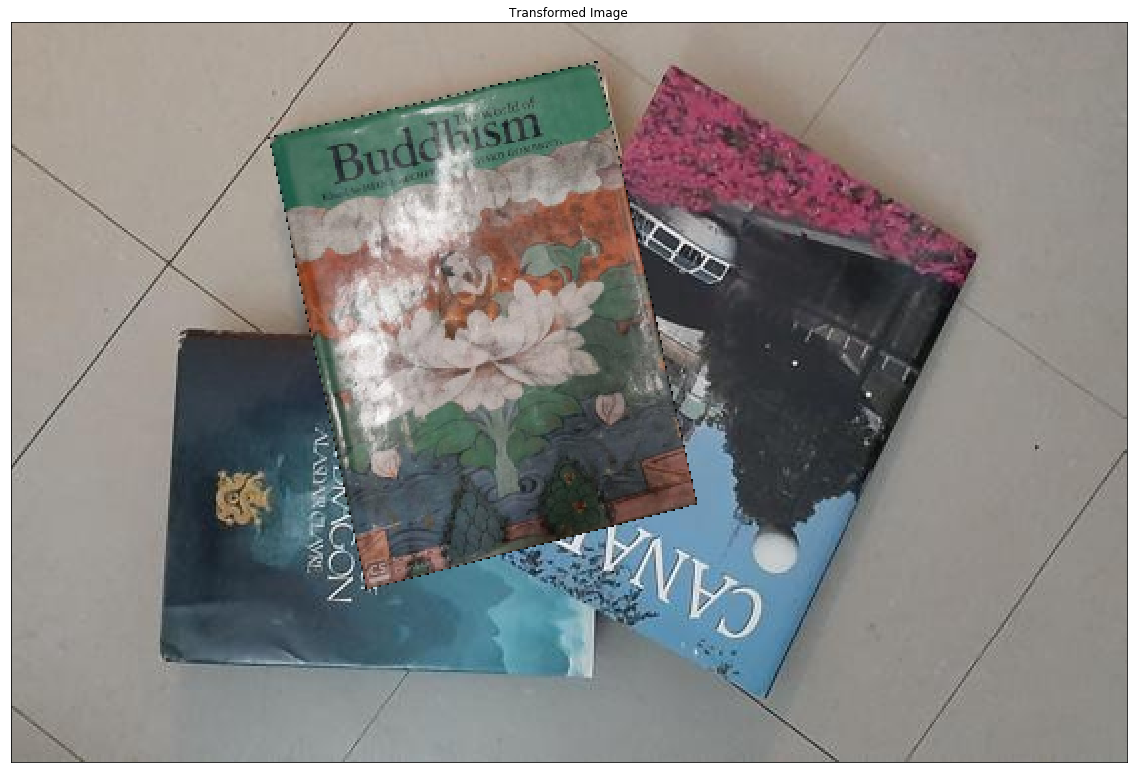

In [65]:
# Pasting transformed reference image on the occluded view

t_image = wimg
for i in range(t_image.shape[0]):
    for j in range(t_image.shape[1]):
            if np.all(t_image[i, j] != 0):
                imgl[i,j] = wimg[i,j]



plt.figure(figsize=(20,20))                
plt.imshow(imgl)
plt.title("Transformed Image"), plt.xticks([]), plt.yticks([])
plt.show()